In [1]:
# Air resistance forces of an idealized thrown slab tumbling in 2D
# (Does not account for moments of inertia)

In [91]:
import sympy as sp
import sympy.physics.mechanics as me

m = sp.symbols("m")
g = sp.Symbol("g")
drag = sp.Symbol('drag')

# Position of slab
x = me.dynamicsymbols('x')
z = me.dynamicsymbols('z')
ytheta = me.dynamicsymbols('ytheta')

# velocity of slab
xv = me.dynamicsymbols('xv')
zv = me.dynamicsymbols('zv')
ythetav = me.dynamicsymbols('ythetav')

xd = me.dynamicsymbols('x', 1)
zd = me.dynamicsymbols('z', 1)
ythetad = me.dynamicsymbols('ytheta', 1)
kinematic_equations = [xv-xd, zv-zd, ythetav-ythetad]

BaseFrame = me.ReferenceFrame('Base')
origin  = me.Point('origin')
origin.set_vel(BaseFrame, 0)

SlabFrame = BaseFrame.orientnew('Slab', 'Axis', [ytheta, BaseFrame.y])
SlabFrame.set_ang_vel(SlabFrame, ythetav * SlabFrame.y)

slabvel = xv*BaseFrame.x + zv*BaseFrame.z
slabpt = origin.locatenew('slab', x*BaseFrame.x + z*BaseFrame.z)
slabpt.set_vel(BaseFrame, slabvel)
Iyy = me.outer(SlabFrame.y, SlabFrame.y)
slabbody = me.RigidBody(name="slab", masscenter=slabpt, frame=SlabFrame, mass=m, 
                        inertia=(Iyy, slabpt))

# the force is perpendicular against the plane of the disc away from the direction of 
# motion with the cosine of the direction times the square of the magnitude
forces = [ (slabpt, -g*m*BaseFrame.z - drag*abs(SlabFrame.z.dot(slabvel))*SlabFrame.z.dot(slabvel)*SlabFrame.z) ]
bodies = [ slabbody ]

kane = me.KanesMethod(BaseFrame, 
                     q_ind=[x, z, ytheta], 
                     u_ind=[xv, zv, ythetav],
                     kd_eqs=kinematic_equations)
fr, frstar = kane.kanes_equations(bodies, forces)
fr

Matrix([
[      -drag*(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))*sin(ytheta(t))*Abs(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))],
[-drag*(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))*cos(ytheta(t))*Abs(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t))) - g*m],
[                                                                                                                        0]])

In [92]:
SlabFrame.z.dot(slabvel)

xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t))

In [110]:
from pydy.system import System
import numpy as np

initial_conditions = {x:0, z:7, ytheta:2, 
                      xv:7, zv:30, ythetav:sp.pi}  # spin every 2 seconds
sys = System(kane,
             constants={m: 1.0, g: 4.8, drag:2},
             #specifieds={ bounceforce: bounceforcefunc },
             initial_conditions=initial_conditions,
             times=np.linspace(0.0, 5.0, 500))
y1 = sys.integrate()



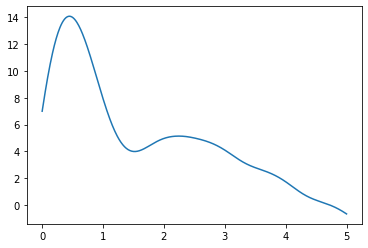

In [111]:
plt.plot(sys.times, y1[:,1])

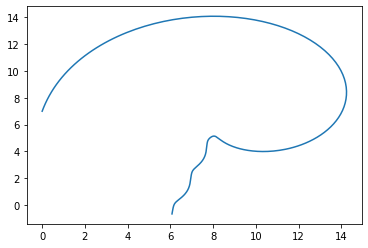

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y1[:,0], y1[:,1])

plt.show()


In [113]:
import pydy.viz as pv
import IPython.display

ground_viz = pv.Plane(10, 10, color='blue')
slab_viz = pv.Cylinder(0.1, 1.0, color='red')
reference_frame, origin = BaseFrame, origin

SlabFrameRot = SlabFrame.orientnew('SlabRot', 'Axis', [sp.pi/2, SlabFrame.x])
        # required to orient the disc axis in z
    
v1 = pv.VisualizationFrame('plate', BaseFrame, origin, ground_viz)
v2 = pv.VisualizationFrame('slab', SlabFrameRot, slabpt, slab_viz)
scene = pv.Scene(reference_frame, origin, v1, v2, system=sys)

scene.display()
#scene.display_ipython()
#IPython.display.display(IPython.display.HTML(scene._html_widget.value))

/home/julian/repositories/Future-Hangglider/HGnotebooks/pydy_modelling/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources/pydy-resources
Serving HTTP on 127.0.0.1 port 8011 ...
To view visualization, open:

http://localhost:8011/index.html?load=2020-03-10_16-20-23_scene_desc.json
Press Ctrl+C to stop server...


127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /index.html?load=2020-03-10_16-20-23_scene_desc.json HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /css/bootstrap.min.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /css/slider.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /css/codemirror/codemirror.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /css/codemirror/blackboard.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /js/external/jquery/jquery.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /js/external/jquery/jquery-ui.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /js/external/bootstrap/bootstrap.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /js/external/codemirror/codemirror.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 16:20:23] "GET /js/external/codemirror/javascript-mode.js HTTP/1.1" 200 -
127.0.